<a href="https://colab.research.google.com/github/Maryam-Dehkordi/Predictive-Analytics-of-Productivity-Prediction-of-Garment-Employees/blob/main/predective%20garment%20productivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


In [144]:
# impord data
data =pd.read_csv("/content/garments_worker_productivity.csv")
# Looking at the dataset
data.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [145]:
# describe data
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [146]:
# Looking at the features types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [147]:
data.shape

(1197, 15)

In [148]:
# Looking at the columns
data.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [149]:
# Looking at the null values in each feature
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [150]:
# Percentage of null values in the dataset
data.isnull().sum()  / data.shape[0] * 100

date                      0.000000
quarter                   0.000000
department                0.000000
day                       0.000000
team                      0.000000
targeted_productivity     0.000000
smv                       0.000000
wip                      42.272348
over_time                 0.000000
incentive                 0.000000
idle_time                 0.000000
idle_men                  0.000000
no_of_style_change        0.000000
no_of_workers             0.000000
actual_productivity       0.000000
dtype: float64

In [151]:
# Separate categorical and numerical data for simplicity in analysis
cat = data.select_dtypes(include='object')
num = data.select_dtypes(exclude='object')

In [152]:
#showing the catgory columns
for col in cat.columns:
    print(f"{col}")
    print(cat[col].unique())
    print()

date
['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']

quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']

department
['sweing' 'finishing ' 'finishing']

day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']



In [153]:
# Department Attribute has space present in one of the values which needs to modification
print('Unique Values in Department before cleaning:')
print(data.department.unique())
print()
data['department'] = data.department.str.strip()
print('Unique Values in Department afer cleaning:')
print(data.department.unique())

Unique Values in Department before cleaning:
['sweing' 'finishing ' 'finishing']

Unique Values in Department afer cleaning:
['sweing' 'finishing']


In [154]:
#showing the numerical columns
for n in num.columns:
    print(n)

team
targeted_productivity
smv
wip
over_time
incentive
idle_time
idle_men
no_of_style_change
no_of_workers
actual_productivity


In [155]:
# checking the categorical feature for make sure all name and group is correct
cat.quarter.value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [156]:
cat.department.value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [157]:
cat.day.value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

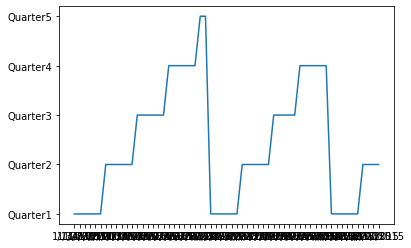

In [158]:
import matplotlib.pyplot as plt
plt.plot(data['date'], data['quarter'])

In [159]:
data['date'] = pd.to_datetime(data['date'])
#Setting date column as index
data.set_index('date', drop = False, inplace=True)
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2015-01-01,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2015-01-01,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


when we checked all feature for null value ,the result shows that "wip" feature has 42% null value and we try to replace the missing data with use interpolate function.

In [160]:
data['wip'].interpolate(method='time',inplace=True)
data.wip

date
2015-01-01    1108.0
2015-01-01     795.0
2015-01-01     968.0
2015-01-01     968.0
2015-01-01    1170.0
               ...  
2015-03-11     935.0
2015-03-11     935.0
2015-03-11     935.0
2015-03-11     935.0
2015-03-11     935.0
Name: wip, Length: 1197, dtype: float64

One of our targets is to dedicate the time feature is an essential and effective factor or not. So, we can first clarify the month of the date and add this feature to our dataset.  

In [161]:
# Clarify month of date and add to featurs
data['month'] = data['date'].dt.month_name() 

data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
date,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,January
2015-01-01,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,795.0,960,0,0.0,0,0,8.0,0.886500,January
2015-01-01,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,January
2015-01-01,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,January
2015-01-01,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,January


As you can see we add a  one feature with month name

The data is divided into categorical features, and we will look at how they are made up

In [162]:
# Add the month and no_of_style_change features to categorical
cat = [ 'quarter', 'department', 'day', 'team', 'no_of_style_change','month']

quarter


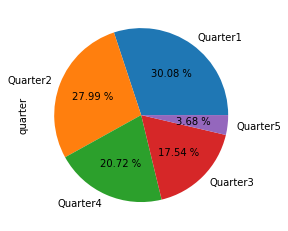


department


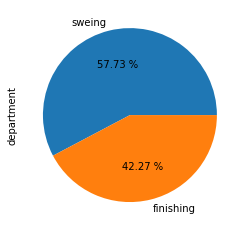


day


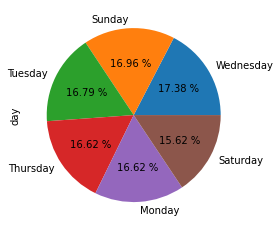


team


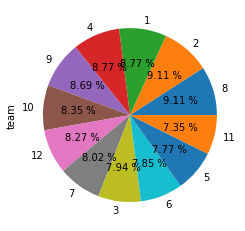


no_of_style_change


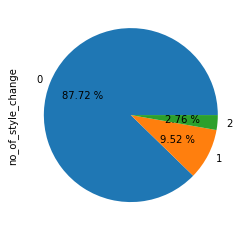


month


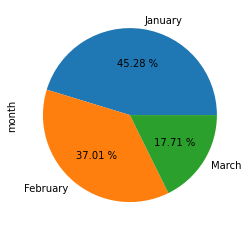

In [163]:
# make  pie charts with "For" structure for categorical feature
for i in range(len(cat)):
    print(cat[i])
    data[cat[i]].value_counts().plot.pie(autopct='%.2f %%')
    plt.show()
    print()

With a Bar chart, we can Analyse the features individually

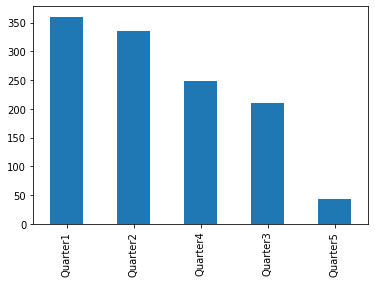

In [164]:
# Bar charts  
data.quarter.value_counts().plot(kind='bar')

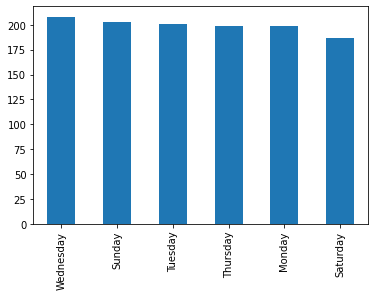

In [165]:
data.day.value_counts().plot(kind='bar')

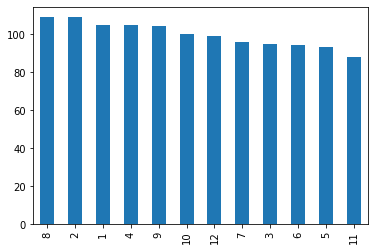

In [166]:
data.team.value_counts().plot(kind='bar')

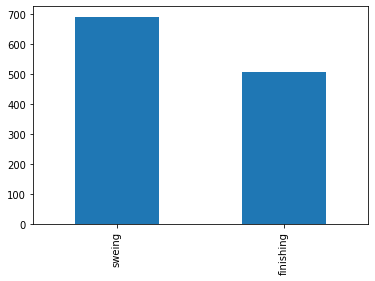

In [167]:
data.department.value_counts().plot(kind='bar')

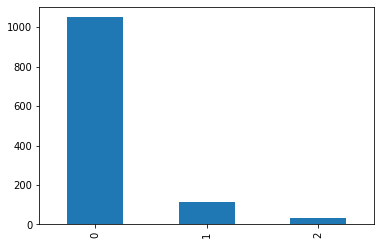

In [168]:
data.no_of_style_change.value_counts().plot(kind='bar')

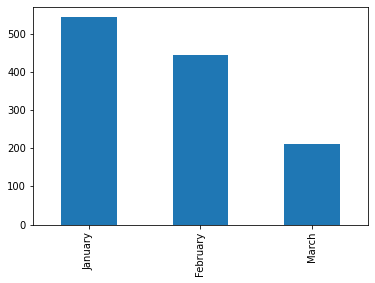

In [169]:
data.month.value_counts().plot(kind='bar')

In [170]:
num.columns


Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')

team


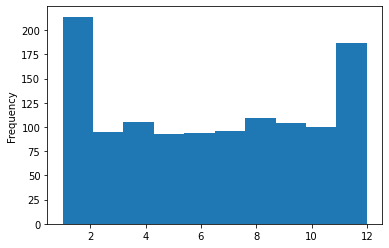


targeted_productivity


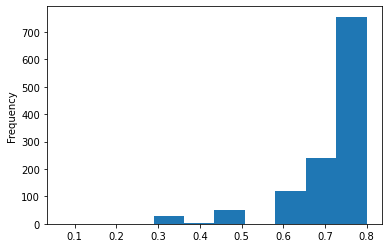


smv


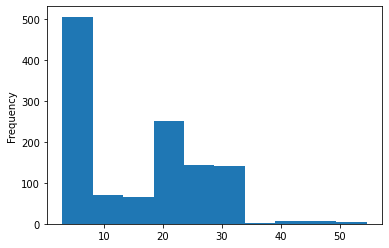


wip


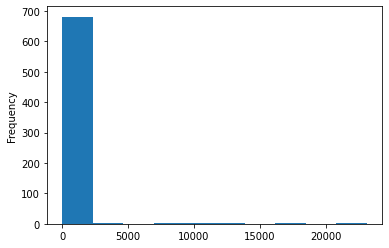


over_time


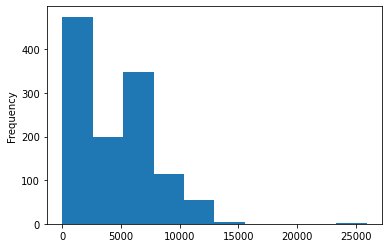


incentive


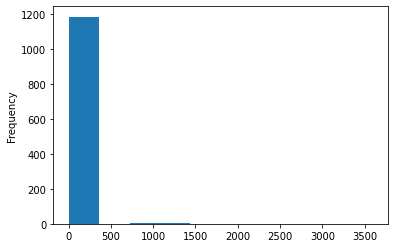


idle_time


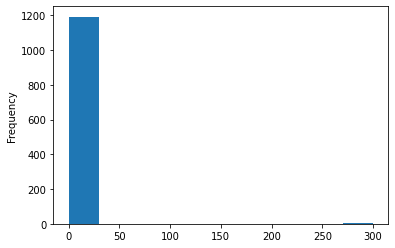


idle_men


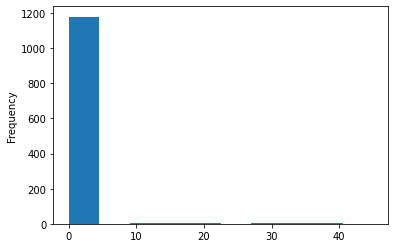


no_of_style_change


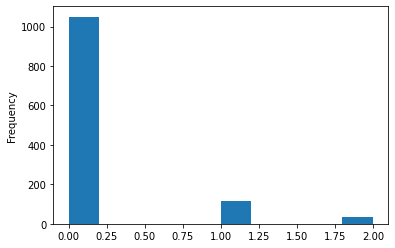


no_of_workers


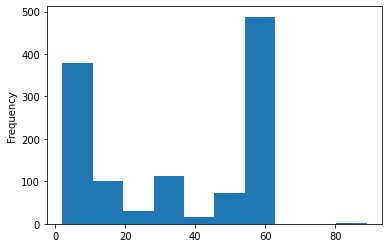


actual_productivity


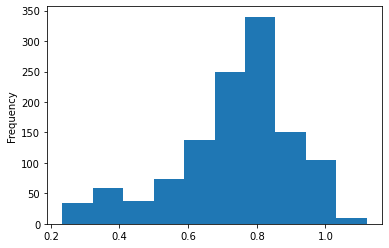

In [171]:
# Creat histogram with "FOR" for numerical feature
for i in range(len(num.columns)):
    print(num.columns[i])
    num.iloc[:, i].plot(kind='hist')
    plt.show()
    print()

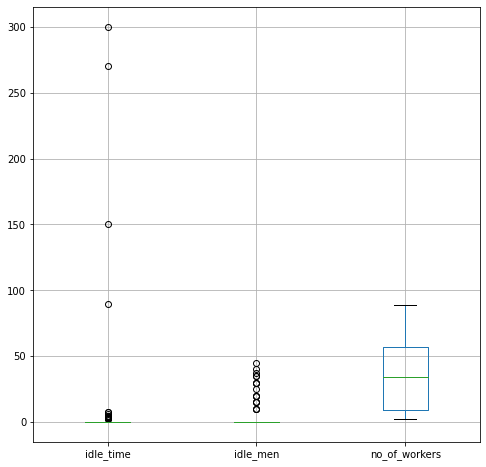

In [172]:
# Creat boxplots for numerical feature
num.boxplot(column = [ 'idle_time', 'idle_men', 'no_of_workers'],figsize=(8,8) )

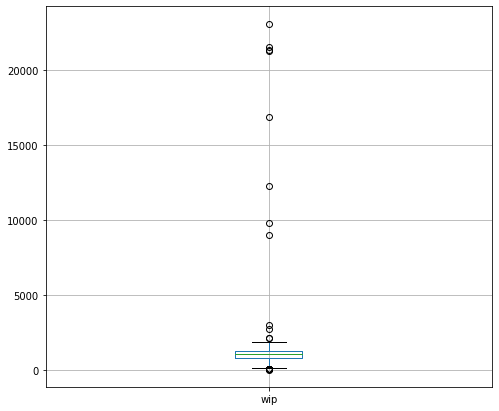

In [173]:
num.boxplot(column=['wip'],figsize=(8,7))

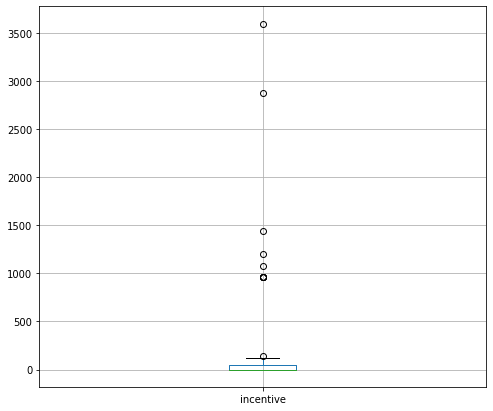

In [174]:
num.boxplot(column=['incentive'],figsize=(8,7))

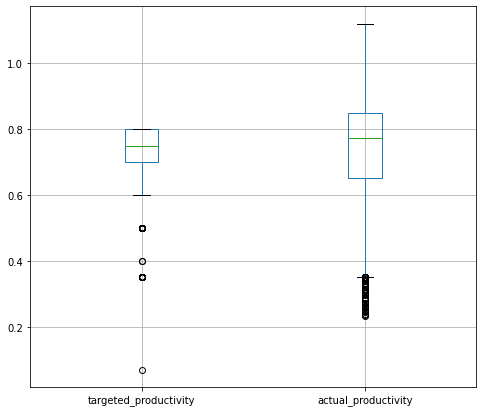

In [175]:
num.boxplot(column = [ 'targeted_productivity', 'actual_productivity'],figsize=(8,7))


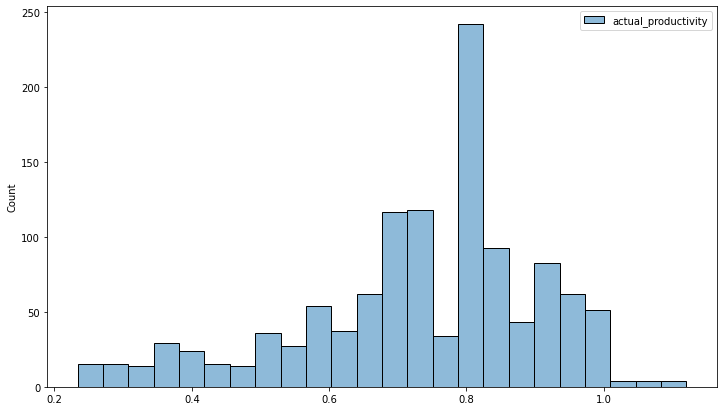

In [176]:
fig_dims = (12,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data[['actual_productivity']],ax=ax)
plt.show()

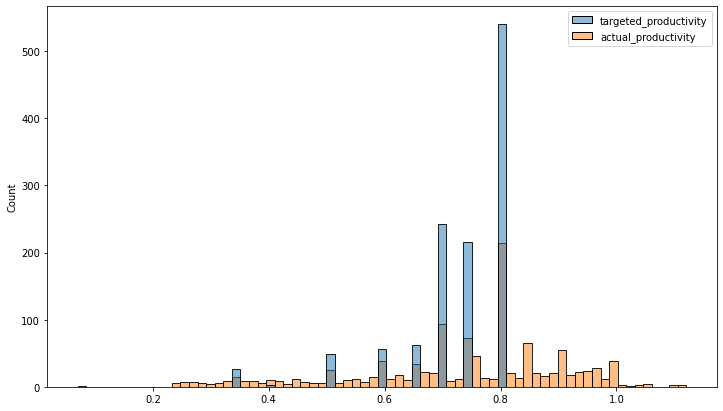

In [177]:

fig_dims = (12,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data[['targeted_productivity', 'actual_productivity']],ax=ax)
plt.show()

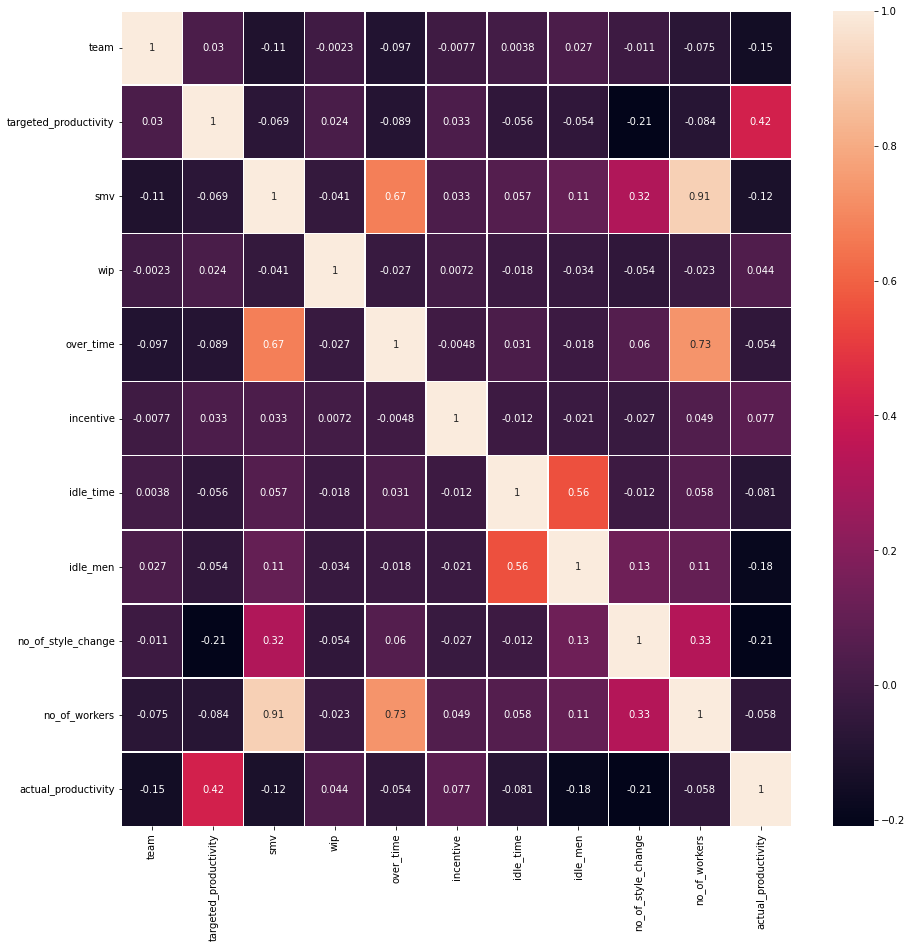

In [178]:
corrMatrix = data.corr()
fig, ax = plt.subplots(figsize=(15,15)) # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

•	 we can see that there is a very high correlation between SMV and no_of_workers.

•	over_time and no_of)workers are correlated

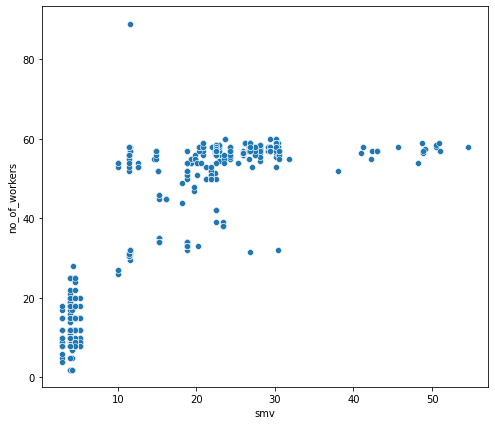

In [179]:
fig, ax = plt.subplots(figsize = (8,7))
sns.scatterplot(x=data['smv'], y=data['no_of_workers'])

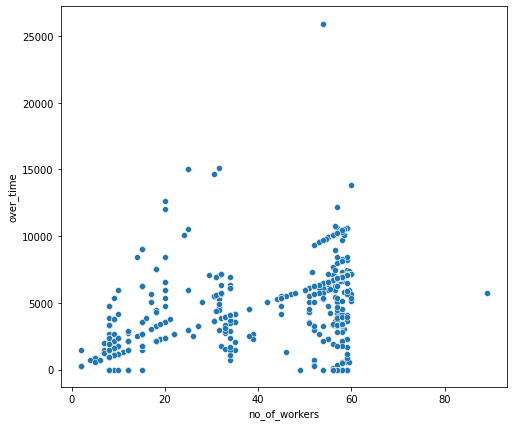

In [180]:
fig, ax = plt.subplots(figsize = (8,7))
sns.scatterplot(x=data['no_of_workers'], y=data['over_time'])

Let us look at few features which have numeric values but are in fact categorical

In [181]:
#check few feature which in fact they are categorical
data['no_of_style_change'].value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

 Encoding: Performing  encoding on the categorical data

In [182]:
data[['quarter', 'department', 'day', 'team','no_of_style_change','month']]

,quarter,department,day,team,no_of_style_change,month
date,,,,,,
2015-01-01,Quarter1,sweing,Thursday,8,0,January
2015-01-01,Quarter1,finishing,Thursday,1,0,January
2015-01-01,Quarter1,sweing,Thursday,11,0,January
2015-01-01,Quarter1,sweing,Thursday,12,0,January
2015-01-01,Quarter1,sweing,Thursday,6,0,January
...,...,...,...,...,...,...
2015-03-11,Quarter2,finishing,Wednesday,10,0,March
2015-03-11,Quarter2,finishing,Wednesday,8,0,March
2015-03-11,Quarter2,finishing,Wednesday,7,0,March


In [183]:
data['team']=data['team'].astype(str)
data['no_of_style_change']=data['no_of_style_change'].astype(str)
data=pd.get_dummies(data)

# Dropping Date column as it is no longer needed
data.drop(columns = 'date',inplace = True)
data.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity,quarter_Quarter1,...,team_6,team_7,team_8,team_9,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2,month_February,month_January,month_March
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.80,26.16,1108.0,7080,98,0.0,0,59.0,0.940725,1,...,0,0,1,0,1,0,0,0,1,0
2015-01-01,0.75,3.94,795.0,960,0,0.0,0,8.0,0.886500,1,...,0,0,0,0,1,0,0,0,1,0
2015-01-01,0.80,11.41,968.0,3660,50,0.0,0,30.5,0.800570,1,...,0,0,0,0,1,0,0,0,1,0
2015-01-01,0.80,11.41,968.0,3660,50,0.0,0,30.5,0.800570,1,...,0,0,0,0,1,0,0,0,1,0
2015-01-01,0.80,25.90,1170.0,1920,50,0.0,0,56.0,0.800382,1,...,1,0,0,0,1,0,0,0,1,0


Scaling

In [184]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
cols_to_scale  = ['smv', 'wip', 'over_time', 'incentive', 'no_of_workers', 'idle_time', 'idle_men']
min_max_scaler = MinMaxScaler()
data[cols_to_scale] = min_max_scaler.fit_transform(data[cols_to_scale])
data.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity,quarter_Quarter1,...,team_6,team_7,team_8,team_9,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2,month_February,month_January,month_March
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.80,0.450252,0.047631,0.273148,0.027222,0.0,0.0,0.655172,0.940725,1,...,0,0,1,0,1,0,0,0,1,0
2015-01-01,0.75,0.020132,0.034090,0.037037,0.000000,0.0,0.0,0.068966,0.886500,1,...,0,0,0,0,1,0,0,0,1,0
2015-01-01,0.80,0.164731,0.041575,0.141204,0.013889,0.0,0.0,0.327586,0.800570,1,...,0,0,0,0,1,0,0,0,1,0
2015-01-01,0.80,0.164731,0.041575,0.141204,0.013889,0.0,0.0,0.327586,0.800570,1,...,0,0,0,0,1,0,0,0,1,0
2015-01-01,0.80,0.445219,0.050314,0.074074,0.013889,0.0,0.0,0.620690,0.800382,1,...,1,0,0,0,1,0,0,0,1,0


After encoding and scaling, we can see and describe now dataset shap

In [185]:
data.describe()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity,quarter_Quarter1,...,team_6,team_7,team_8,team_9,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2,month_February,month_January,month_March
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,...,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,0.235427,0.053902,0.176214,0.010614,0.002434,0.008206,0.374826,0.735091,0.300752,...,0.078530,0.080201,0.091061,0.086884,0.877193,0.095238,0.027569,0.370092,0.452799,0.177109
std,0.097891,0.211832,0.094878,0.129198,0.044495,0.042366,0.072644,0.255146,0.174488,0.458777,...,0.269116,0.271717,0.287816,0.281783,0.328353,0.293666,0.163803,0.483031,0.497975,0.381921
min,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233705,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.700000,0.020132,0.034999,0.055556,0.000000,0.000000,0.000000,0.080460,0.650307,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.750000,0.239257,0.044646,0.152778,0.000000,0.000000,0.000000,0.367816,0.773333,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,0.413473,0.053515,0.268519,0.013889,0.000000,0.000000,0.632184,0.850253,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.120437,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1197 entries, 2015-01-01 to 2015-03-11
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   targeted_productivity  1197 non-null   float64
 1   smv                    1197 non-null   float64
 2   wip                    1197 non-null   float64
 3   over_time              1197 non-null   float64
 4   incentive              1197 non-null   float64
 5   idle_time              1197 non-null   float64
 6   idle_men               1197 non-null   float64
 7   no_of_workers          1197 non-null   float64
 8   actual_productivity    1197 non-null   float64
 9   quarter_Quarter1       1197 non-null   uint8  
 10  quarter_Quarter2       1197 non-null   uint8  
 11  quarter_Quarter3       1197 non-null   uint8  
 12  quarter_Quarter4       1197 non-null   uint8  
 13  quarter_Quarter5       1197 non-null   uint8  
 14  department_finishing   1197 non-null  

In [187]:
#Training & Splitting
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
#from sklearn.model_selection import StratifiedKFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')

X, y = data.drop(['actual_productivity'], axis=1), data['actual_productivity']#.astype(int)

clf = DecisionTreeClassifier(random_state=42)

##ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)
#scores = cross_val_score(clf, X, y, cv = ss)

k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf, X, y, cv = k_folds)

#sk_folds = StratifiedKFold(n_splits = 5)
#scores = cross_val_score(clf, X, y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [nan nan nan nan nan]
Average CV Score:  nan
Number of CV Scores used in Average:  5


In [188]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)

(837, 39)


In [189]:
input_shape = 39

In [190]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
# Creating an estimator
ridge = Ridge()
# Creating RFE object 
rfe = RFE(estimator = ridge, n_features_to_select = input_shape, verbose = 1)
# Fitting the training data into our model
rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('targeted_productivity', True, 1),
 ('smv', True, 1),
 ('wip', True, 1),
 ('over_time', True, 1),
 ('incentive', True, 1),
 ('idle_time', True, 1),
 ('idle_men', True, 1),
 ('no_of_workers', True, 1),
 ('quarter_Quarter1', True, 1),
 ('quarter_Quarter2', True, 1),
 ('quarter_Quarter3', True, 1),
 ('quarter_Quarter4', True, 1),
 ('quarter_Quarter5', True, 1),
 ('department_finishing', True, 1),
 ('department_sweing', True, 1),
 ('day_Monday', True, 1),
 ('day_Saturday', True, 1),
 ('day_Sunday', True, 1),
 ('day_Thursday', True, 1),
 ('day_Tuesday', True, 1),
 ('day_Wednesday', True, 1),
 ('team_1', True, 1),
 ('team_10', True, 1),
 ('team_11', True, 1),
 ('team_12', True, 1),
 ('team_2', True, 1),
 ('team_3', True, 1),
 ('team_4', True, 1),
 ('team_5', True, 1),
 ('team_6', True, 1),
 ('team_7', True, 1),
 ('team_8', True, 1),
 ('team_9', True, 1),
 ('no_of_style_change_0', True, 1),
 ('no_of_style_change_1', True, 1),
 ('no_of_style_change_2', True, 1),
 ('month_February', True, 1),

In [191]:
# Let us look at the columns which have been supported by the RFE
RFE_ridge_support_columns = X_train.columns[rfe.support_]
RFE_ridge_support_columns

Index(['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_workers', 'quarter_Quarter1',
       'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4',
       'quarter_Quarter5', 'department_finishing', 'department_sweing',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'team_1', 'team_10', 'team_11',
       'team_12', 'team_2', 'team_3', 'team_4', 'team_5', 'team_6', 'team_7',
       'team_8', 'team_9', 'no_of_style_change_0', 'no_of_style_change_1',
       'no_of_style_change_2', 'month_February', 'month_January',
       'month_March'],
      dtype='object')

In [192]:
# Preparing a new dataset containing only the RFE support columns data
X_train = X_train[RFE_ridge_support_columns]

# Preparing a new dataset containing only the RFE support columns data
X_test = X_test[RFE_ridge_support_columns]
X_test.head()


,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,quarter_Quarter1,quarter_Quarter2,...,team_6,team_7,team_8,team_9,no_of_style_change_0,no_of_style_change_1,no_of_style_change_2,month_February,month_January,month_March
date,,,,,,,,,,,,,,,,,,,,,
2015-02-04,0.70,0.024197,0.054337,0.115741,0.000000,0.0,0.0,0.264368,1,0,...,0,0,1,0,1,0,0,1,0,0
2015-02-23,0.80,0.000000,0.035432,0.037037,0.000000,0.0,0.0,0.068966,0,0,...,1,0,0,0,1,0,0,1,0,0
2015-02-23,0.70,0.512969,0.052823,0.268519,0.008333,0.0,0.0,0.643678,0,0,...,0,0,0,0,0,0,1,1,0,0
2015-02-08,0.80,0.379791,0.059745,0.259259,0.024444,0.0,0.0,0.620690,0,1,...,0,0,0,0,1,0,0,1,0,0
2015-02-28,0.75,0.000000,0.043478,0.129630,0.000000,0.0,0.0,0.068966,0,0,...,1,0,0,0,1,0,0,1,0,0


In [193]:
# Applying metric's formula 
from sklearn import metrics
models_metrics = pd.DataFrame(columns = [ 'models','mae','mse', 'rmse' ,'mape', 'R2'])
def evaluate_model(model,Y_actual,Y_Predicted, df): 
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    mae=metrics.mean_absolute_error(Y_actual, Y_Predicted)
    mse=metrics.mean_squared_error(Y_actual, Y_Predicted)
    rmse=np.sqrt(metrics.mean_squared_error(Y_actual, Y_Predicted))
    r2 = metrics.r2_score(Y_actual, Y_Predicted)
    df2 = {'models':model,'mae':mae,'mse':mse, 'rmse':rmse, 'mape':mape, 'R2': r2}
    df = df.append(df2, ignore_index = True)
    return df
   

In [194]:
#Model Building
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [195]:

#Linear Regression Model
# Building a model
model_linear = LinearRegression()
model_linear.fit(X_train,y_train)
#Prediction using test set 
y_linear_pred = model_linear.predict(X_test)
models_metrics = evaluate_model('Linear Regression', y_test, y_linear_pred, models_metrics)




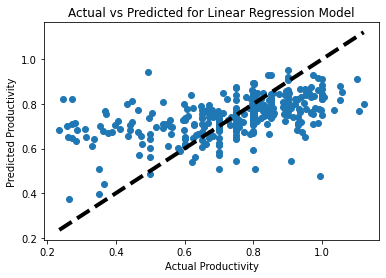

In [196]:
plt.scatter(y_test, y_linear_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for Linear Regression Model")
plt.show()

In [197]:
#Lasso Model
# Building a model
model_lasso = Lasso()
model_lasso.fit(X_train,y_train)
#Prediction using test set 
y_lasso_pred = model_lasso.predict(X_test)
models_metrics = evaluate_model('Lasso Regression', y_test, y_lasso_pred, models_metrics)

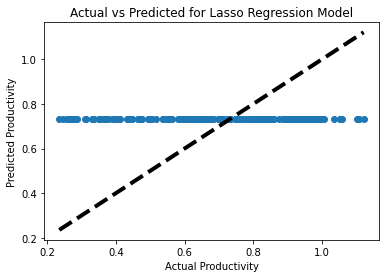

In [198]:
plt.scatter(y_test, y_lasso_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for Lasso Regression Model")
plt.show()


In [199]:
#Ridge Model
# Building a model
model_ridge = Ridge()
model_ridge.fit(X_train,y_train)
#Prediction using test set 
y_ridge_pred = model_ridge.predict(X_test)
# Checking with metrics
models_metrics = evaluate_model('Ridge Regression', y_test, y_ridge_pred, models_metrics)

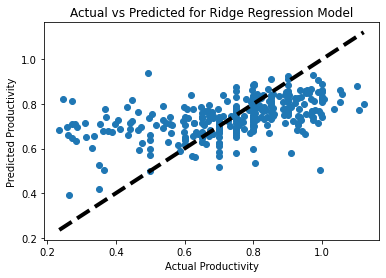

In [200]:
plt.scatter(y_test, y_ridge_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for Ridge Regression Model")
plt.show()

In [201]:
models_metrics

,models,mae,mse,rmse,mape,R2
0,Linear Regression,0.110267,0.023685,0.153900,19.803028,0.267459
1,Lasso Regression,0.140868,0.032453,0.180146,24.618050,-0.003697
2,Ridge Regression,0.111156,0.023950,0.154757,19.986809,0.259284


In [202]:
#Decision Tree
model_dt = DecisionTreeRegressor(random_state = 0)
model_dt.fit(X_train,y_train)
#Prediction using test set 
y_dt_pred = model_dt.predict(X_test)
# Checking with metrics
models_metrics = evaluate_model('Decision Tree Regression', y_test, y_dt_pred, models_metrics)

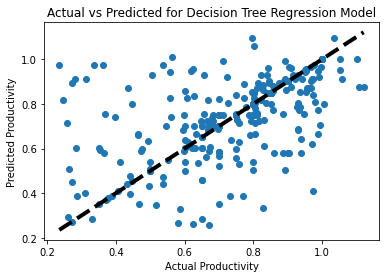

In [203]:
plt.scatter(y_test, y_dt_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for Decision Tree Regression Model")
plt.show()

In [204]:
#Random Forest
# Building a model
model_rf = RandomForestRegressor(n_estimators = 100 ,  random_state = 10)
model_rf.fit(X_train,y_train)
#Prediction using test set 
y_rf_pred = model_rf.predict(X_test)
# Checking with metrics
models_metrics = evaluate_model('Random Forest Regression', y_test, y_rf_pred, models_metrics)

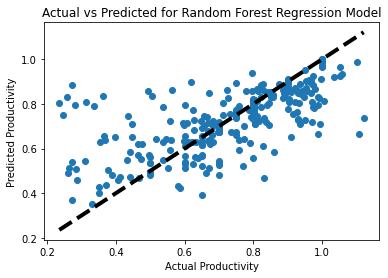

In [205]:
plt.scatter(y_test, y_rf_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for Random Forest Regression Model")
plt.show()

In [206]:
#SVR Models
model_svr = SVR(C=25)
model_svr.fit(X_train, y_train)
y_svr_pred = model_svr.predict(X_test)
# model_svr.score(x2_test, y2_test)
models_metrics = evaluate_model('Support Vector Regression', y_test, y_svr_pred, models_metrics)

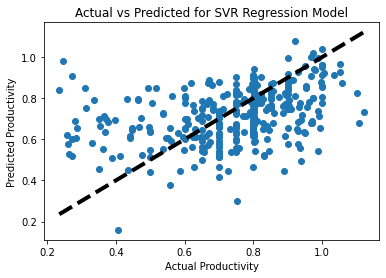

In [207]:
plt.scatter(y_test, y_svr_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for SVR Regression Model")
plt.show()

In [208]:
#KNeighbors Regression
model_kn = KNeighborsRegressor()
model_kn.fit(X_train, y_train)
y_kn_pred = model_kn.predict(X_test)
models_metrics = evaluate_model('KNeighbour Regression def', y_test, y_kn_pred, models_metrics)

In [209]:
model_kn = KNeighborsRegressor(n_neighbors=3)
model_kn.fit(X_train, y_train)
y_kn_pred = model_kn.predict(X_test)
models_metrics = evaluate_model('KNeighbour Regression 3', y_test, y_kn_pred, models_metrics)

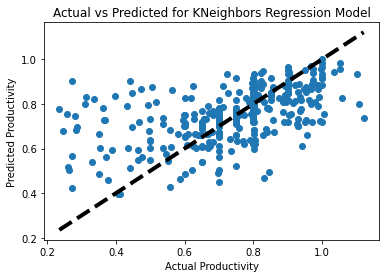

In [210]:
plt.scatter(y_test, y_kn_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for KNeighbors Regression Model")
plt.show()

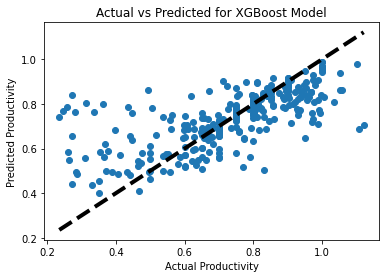

In [211]:
#XG Boost
import xgboost as xgb
xgbr = xgb.XGBRegressor(verbosity = 0)
xgbr.fit(X_train, y_train)
y_xgb_pred = xgbr.predict(X_test)
models_metrics = evaluate_model('XGBoost', y_test, y_xgb_pred, models_metrics)
plt.scatter(y_test, y_xgb_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for XGBoost Model")
plt.show()

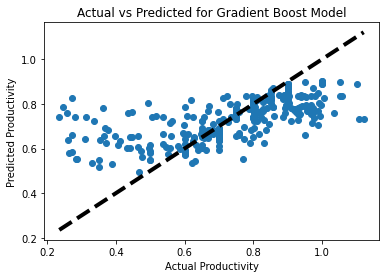

In [212]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)

model_gbr.fit(X_train, y_train)
y_gbr_pred = model_gbr.predict(X_test)
models_metrics = evaluate_model('Gradient Boost', y_test, y_gbr_pred, models_metrics)
plt.scatter(y_test, y_gbr_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted for Gradient Boost Model")
plt.show()

In [213]:
models_metrics

,models,mae,mse,rmse,mape,R2
0,Linear Regression,0.110267,0.023685,0.153900,19.803028,0.267459
1,Lasso Regression,0.140868,0.032453,0.180146,24.618050,-0.003697
2,Ridge Regression,0.111156,0.023950,0.154757,19.986809,0.259284
3,Decision Tree Regression,0.093533,0.027623,0.166202,17.142705,0.145668
4,Random Forest Regression,0.080099,0.017772,0.133313,15.076788,0.450336
5,Support Vector Regression,0.134014,0.031629,0.177845,22.971230,0.021781
6,KNeighbour Regression def,0.108861,0.024754,0.157333,20.090120,0.234413
7,KNeighbour Regression 3,0.102841,0.023634,0.153733,19.079482,0.269054
8,XGBoost,0.082941,0.016914,0.130053,15.478474,0.476892
9,Gradient Boost,0.092231,0.019073,0.138105,17.166338,0.410105
